# House Pricing Prediction

## Install Packages

In [1]:
%pip install pandas numpy scipy scikit-learn matplotlib seaborn xgboost catboost lightgbm

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import lightgbm as lgb

## Load Data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Removing Outliers

In [4]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

In [5]:
train_df = train_df[train_df.Id.isin(values) == False]

## Inspecting Null Values

In [6]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)
# Drop PoolQC, MiscFeature. Alley

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76


In [7]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [8]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [9]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

/tmp/ipykernel_270378/2277165759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('No', inplace=True)
/tmp/ipykernel_270378/2277165759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

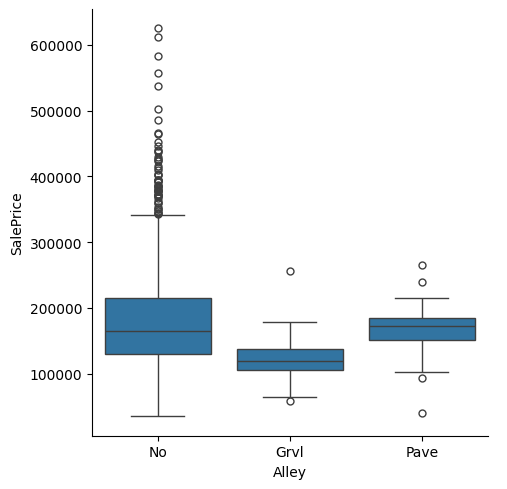

In [10]:
sns.catplot(data=train_df, x='Alley', y='SalePrice', kind='box')

In [11]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [12]:
train_df['Fence'].fillna('No', inplace=True)
test_df['Fence'].fillna('No', inplace=True)

/tmp/ipykernel_270378/3730986352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Fence'].fillna('No', inplace=True)
/tmp/ipykernel_270378/3730986352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

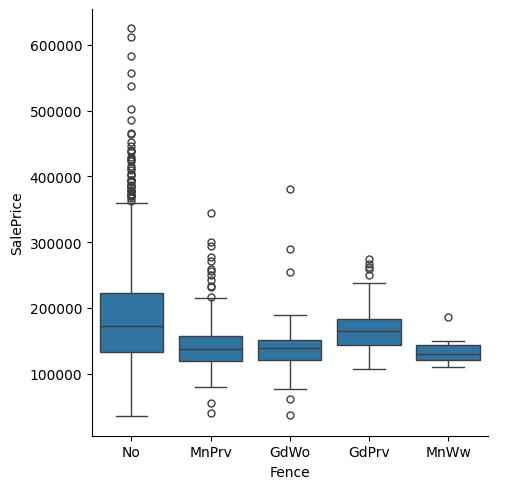

In [13]:
sns.catplot(data=train_df, x='Fence', y='SalePrice', kind='box')

In [14]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [15]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

/tmp/ipykernel_270378/2175816292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('No', inplace=True)
/tmp/ipykernel_270378/2175816292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

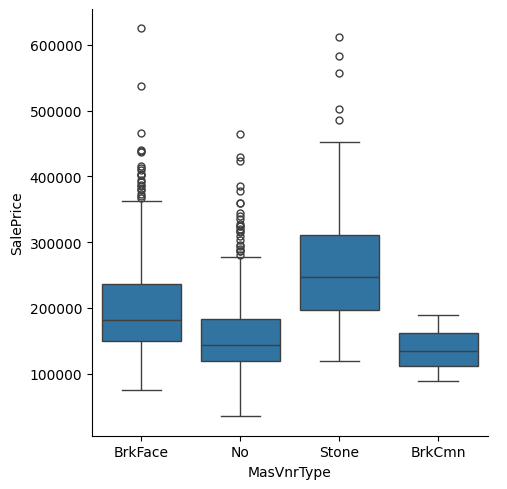

In [16]:
sns.catplot(data=train_df, x='MasVnrType', y='SalePrice', kind='box')

In [17]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

/tmp/ipykernel_270378/3657060107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrArea'].fillna(0, inplace=True)
/tmp/ipykernel_270378/3657060107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [18]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [19]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

/tmp/ipykernel_270378/2825947256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna('No', inplace=True)
/tmp/ipykernel_270378/2825947256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

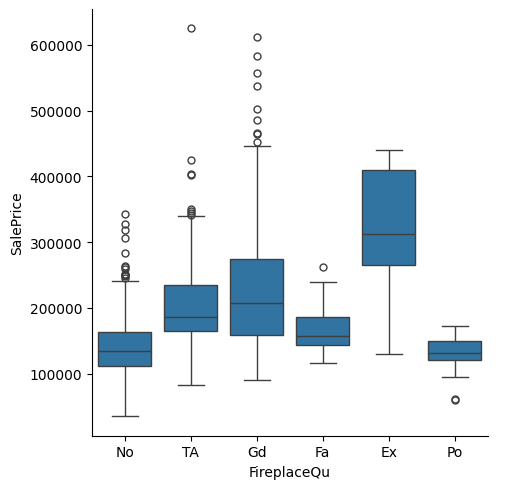

In [20]:
sns.catplot(data=train_df, x='FireplaceQu', y='SalePrice', kind='box')

In [21]:
train_df['Fireplaces'].unique()

array([0, 1, 2, 3])

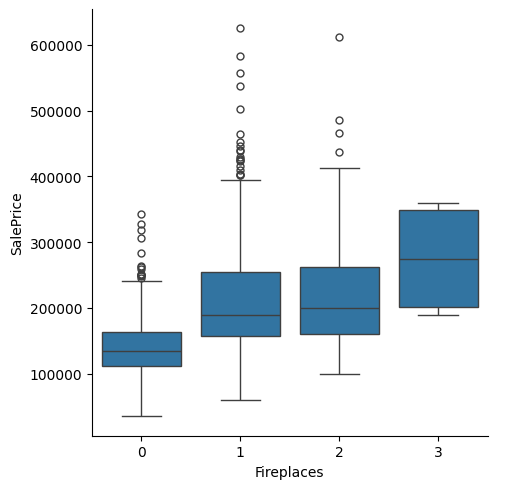

In [22]:
sns.catplot(data=train_df, x='Fireplaces', y='SalePrice', kind='box')

In [23]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

/tmp/ipykernel_270378/1334701034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(0, inplace=True)
/tmp/ipykernel_270378/1334701034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [24]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])
# Drop GarageYrBlt

0.8289827595060575

In [25]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

/tmp/ipykernel_270378/1255948083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageCond'].fillna('No', inplace=True)
/tmp/ipykernel_270378/1255948083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

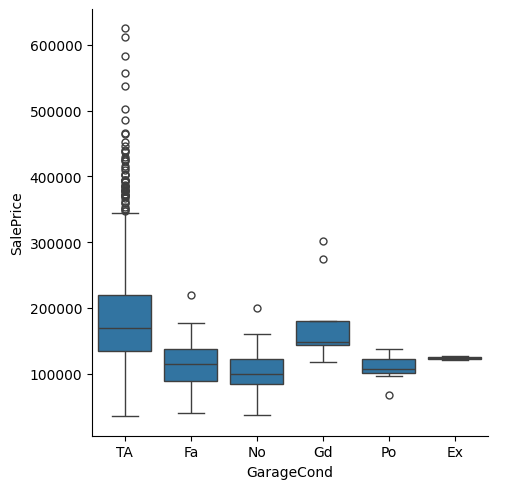

In [26]:
sns.catplot(data=train_df, x='GarageCond', y='SalePrice', kind='box')

In [27]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

/tmp/ipykernel_270378/3721453499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageType'].fillna('No', inplace=True)
/tmp/ipykernel_270378/3721453499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

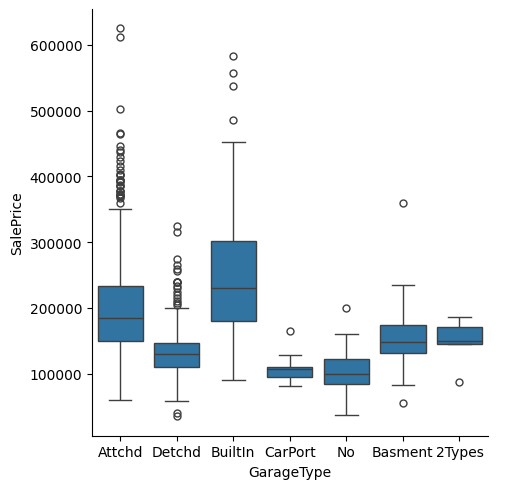

In [28]:
sns.catplot(data=train_df, x='GarageType', y='SalePrice', kind='box')

In [29]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

/tmp/ipykernel_270378/2912414829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GarageFinish'].fillna('No', inplace=True)
/tmp/ipykernel_270378/2912414829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

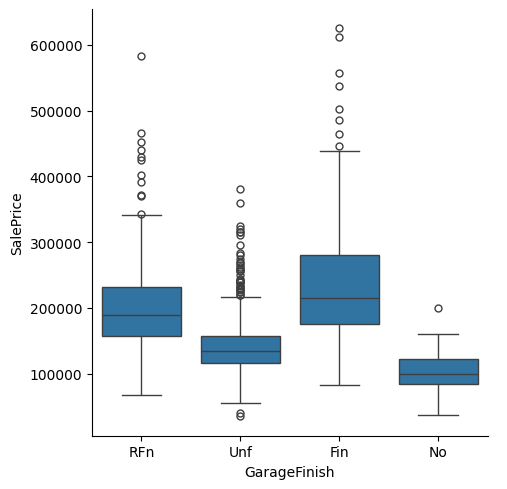

In [30]:
sns.catplot(data=train_df, x='GarageFinish', y='SalePrice', kind='box')

In [31]:
train_df.fillna({'GarageQual': 'No'}, inplace=True)
test_df.fillna({'GarageQual': 'No'}, inplace=True)

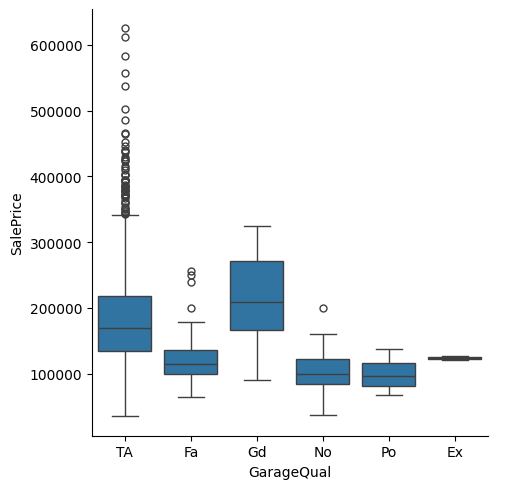

In [32]:
sns.catplot(data=train_df, x='GarageQual', y='SalePrice', kind='box')

In [33]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [34]:
train_df.fillna({'BsmtFinType2': 'Unf'}, inplace=True)
test_df.fillna({'BsmtFinType2': 'Unf'}, inplace=True)

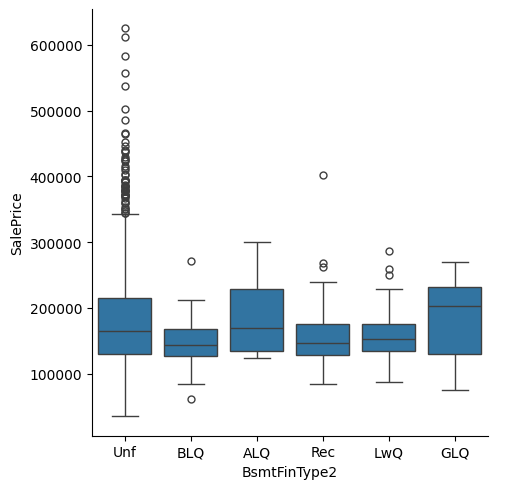

In [35]:
sns.catplot(data=train_df, x='BsmtFinType2', y='SalePrice', kind='box')

In [36]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [37]:
train_df.fillna({'BsmtExposure': 'No'}, inplace=True)
test_df.fillna({'BsmtExposure': 'No'}, inplace=True)

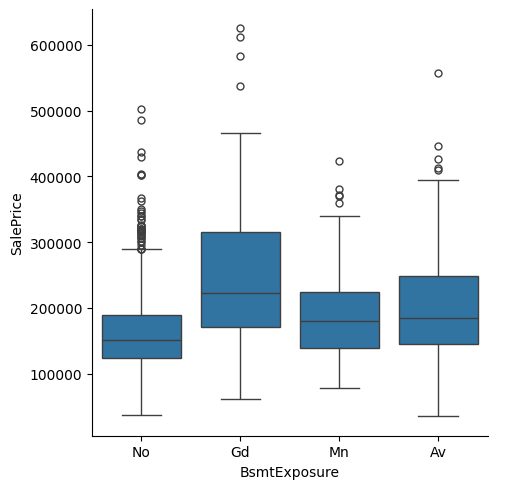

In [38]:
sns.catplot(data=train_df, x='BsmtExposure', y='SalePrice', kind='box')

In [39]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [40]:
train_df.fillna({'BsmtQual': 'No'}, inplace=True)
test_df.fillna({'BsmtQual': 'No'}, inplace=True)

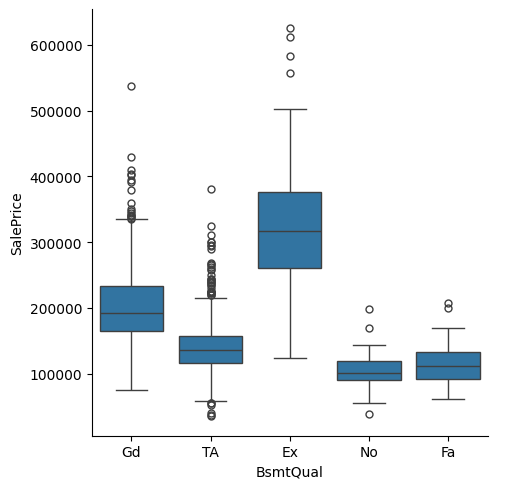

In [41]:
sns.catplot(data=train_df, x='BsmtQual', y='SalePrice', kind='box')

In [42]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [43]:
train_df.fillna({'BsmtCond': 'No'}, inplace=True)
test_df.fillna({'BsmtCond': 'No'}, inplace=True)

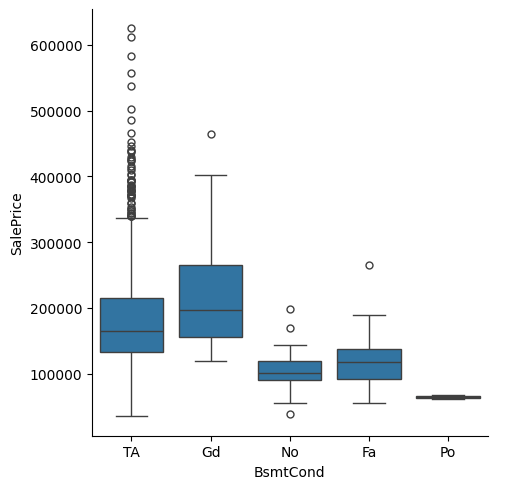

In [44]:
sns.catplot(data=train_df, x='BsmtCond', y='SalePrice', kind='box')

In [45]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [46]:
train_df.fillna({'BsmtFinType1': 'Unf'}, inplace=True)
test_df.fillna({'BsmtFinType1': 'Unf'}, inplace=True)

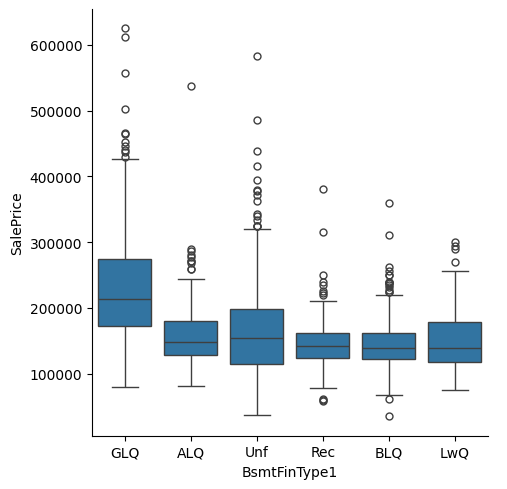

In [47]:
sns.catplot(data=train_df, x='BsmtFinType1', y='SalePrice', kind='box')

In [48]:
train_df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [49]:
train_df.fillna({'MasVnrArea': 0}, inplace=True)
test_df.fillna({'MasVnrArea': 0}, inplace=True)

In [50]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [51]:
train_df.fillna({'Electrical': 'SBrkr'}, inplace=True)
test_df.fillna({'Electrical': 'SBrkr'}, inplace=True)

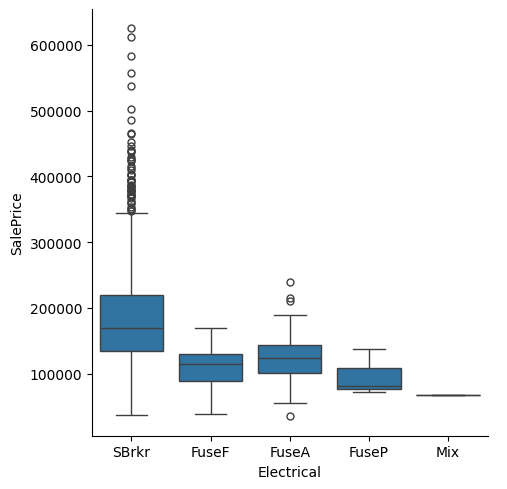

In [52]:
sns.catplot(data=train_df, x='Electrical', y='SalePrice', kind='box')

## Dropping Columns

In [53]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

## Feature Engineering

In [54]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

In [55]:
train_df['HouseRemodelAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['HouseRemodelAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [56]:
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [57]:
train_df['TotalArea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['TotalArea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [58]:
train_df['TotalBaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5*(train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['TotalBaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5*(test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [59]:
train_df['TotalPorchSF'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['TotalPorchSF'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [60]:
train_df = train_df.drop(columns=['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'])

<Axes: >

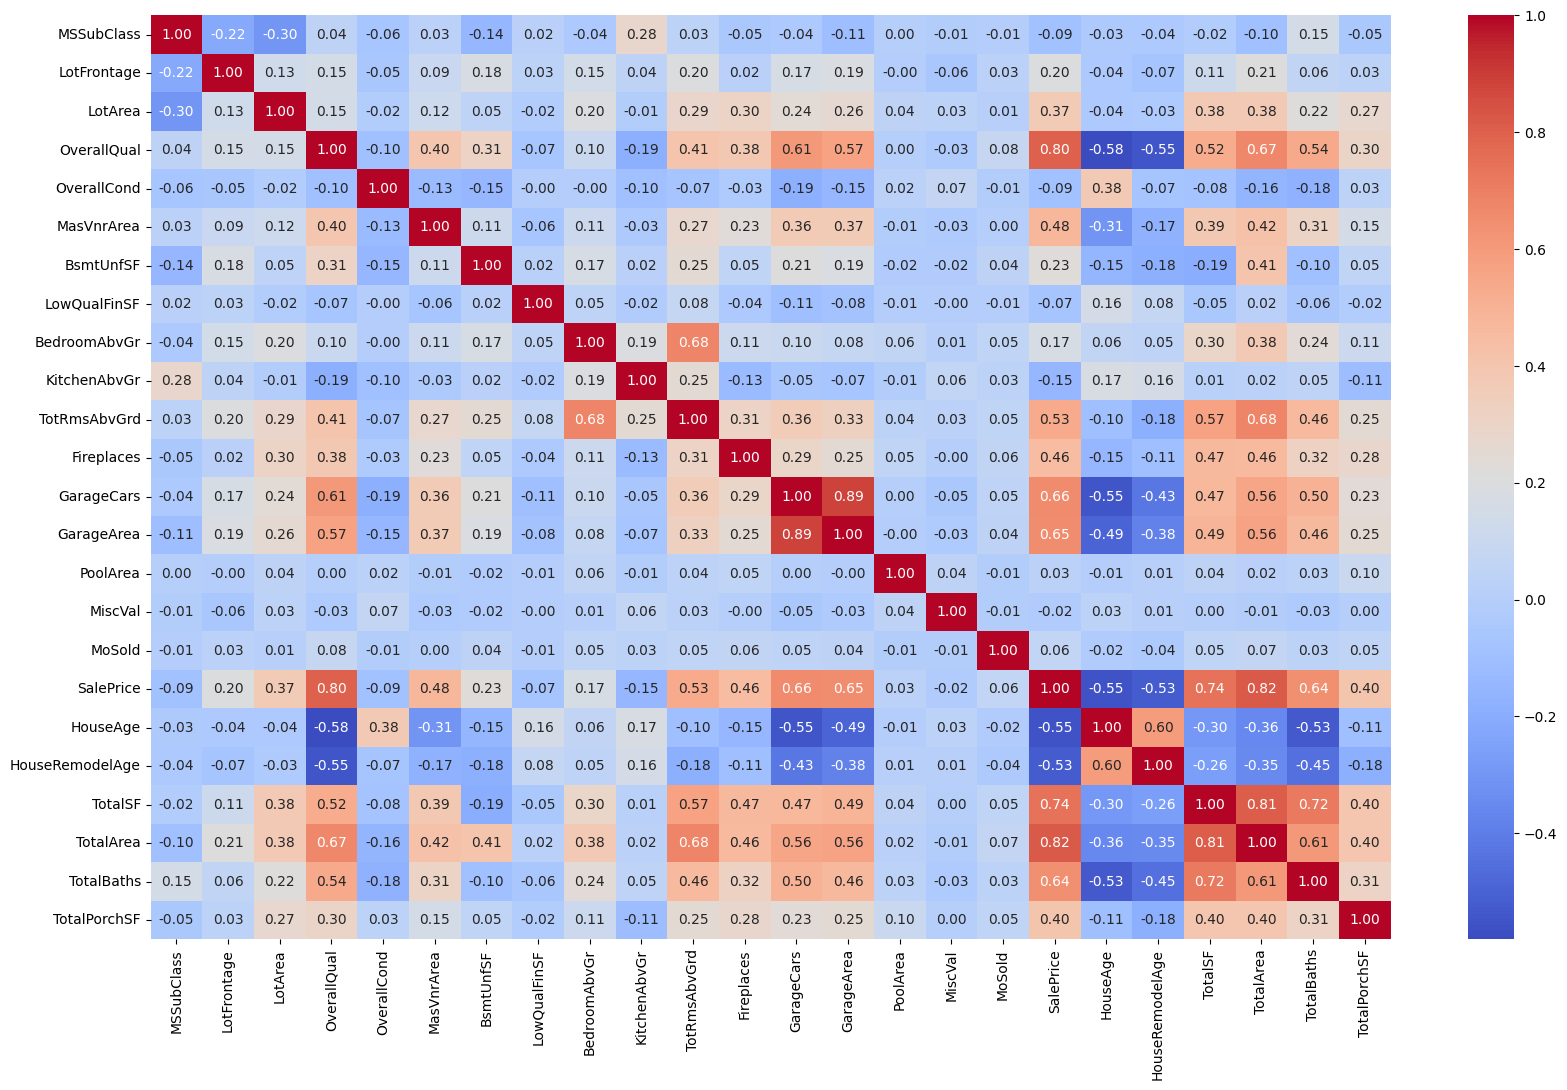

In [61]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

Either drop `GarageArea` or `GarageCars`

In [62]:
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

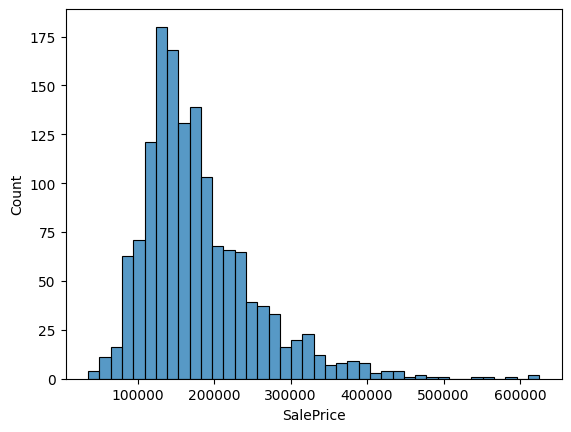

In [63]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [64]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

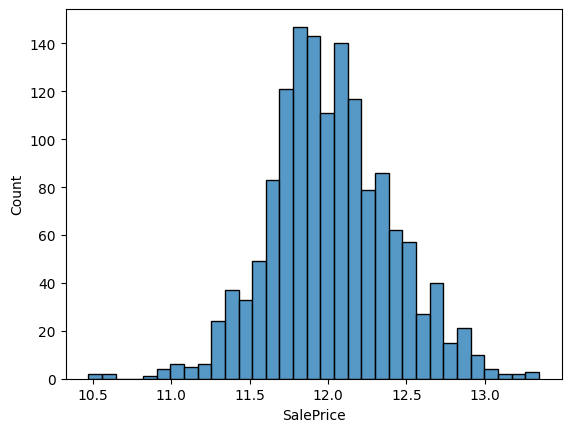

In [65]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [66]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [67]:
train_df.dtypes[train_df.dtypes!='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
HouseAge             int64
HouseRemodelAge      int64
TotalSF              int64
TotalArea            int64
TotalBaths         float64
TotalPorchSF         int64
dtype: object

## Selecting Feature Encodings

In [68]:
ordinal_encoding_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [69]:
one_hot_encoding_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [70]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

## Building Pipelines

In [71]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [72]:
ordinal_encoding_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [73]:
one_hot_encoding_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [74]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('ordinal_encoding_pipeline', ordinal_encoding_pipeline, ordinal_encoding_cols),
    ('one_hot_encoding_pipeline', one_hot_encoding_pipeline, one_hot_encoding_cols)
], remainder='passthrough', n_jobs=-1) 

## Finalizing Features and Target

In [75]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [76]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [77]:
X_preprocessed = pipeline.fit_transform(X)

## Splitting into Train and Test Sets

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y, test_size=0.2, random_state=25)

## Building Models

### Linear Regressor

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [80]:
mean_squared_error(y_test, y_pred_lr)

4.582841476947068e+16

### Random Forest Regressor

In [82]:
RFR = RandomForestRegressor(random_state=13)

param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

rfr_cv = GridSearchCV(estimator=RFR, param_grid=param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [83]:
np.sqrt(-1 * rfr_cv.best_score_)

0.13392793781864115

### XGBoost Regressor

In [84]:
XGB = XGBRegressor(random_state=13)

param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_cv = GridSearchCV(estimator=XGB, param_grid=param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [85]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11933683622521173

### Ridge Regressor

In [86]:
ridge = Ridge()

param_grid_Ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'],
}

ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid_Ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

/home/mirai/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mirai/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mirai/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mirai/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mirai/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [87]:
np.sqrt(-1 * ridge_cv.best_score_)

0.10909706964109693

### Gradient Boosting Regressor

In [88]:
GBR = GradientBoostingRegressor()

param_grid_gbr = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

gbr_cv = GridSearchCV(estimator=GBR, param_grid=param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [89]:
np.sqrt(-1 * gbr_cv.best_score_)

0.11324236913638881

### Light Gradient Boosting Regressor

In [90]:
lgbm = lgb.LGBMRegressor()

param_grid_lgbm =  {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgbm_cv = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1802
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 102
[LightGBM] [Info] Start training from score 12.020705
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1816
[LightGBM] [Info] Number of data points in the train set: 767, number of used features: 102
[LightGBM] [Info] Start training from score 12.032237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.935945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [91]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.12728980697034

### Voting Regressor

In [92]:
vr = VotingRegressor([
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('ridge', ridge_cv.best_estimator_)
], weights=[2,3,1])

vr.fit(X_train, y_train)
y_pred_vr = vr.predict(X_test)

In [94]:
mean_squared_error(y_test, y_pred_vr, squared=False)

/home/mirai/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.11854964692304965

### Cat Boost Regressor

In [95]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

param_grid_catboost = {
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

catboost_cv = GridSearchCV(estimator=catboost, param_grid=param_grid_catboost, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
catboost_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fa6df606ae0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [96]:
np.sqrt(-1 * catboost_cv.best_score_)

0.11495736655121701

### Stack Regressor

In [97]:
estimators = [
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('catboost', catboost_cv.best_estimator_),
    ('lgbm', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=vr)
stacking_regressor.fit(X_train, y_train)
y_pred_stack = stacking_regressor.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 112
[LightGBM] [Info] Start training from score 12.023259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 920, number of used features: 106
[LightGBM] [Info] Start training from score 12.032469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

In [99]:
mean_squared_error(y_test, y_pred_stack, squared=False)

/home/mirai/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.11631693758890015

In [101]:
df_test_preprocess = pipeline.transform(test_df)

In [102]:
y_stacking = np.exp(stacking_regressor.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)


KeyError: "None of [Index(['Id'], dtype='object')] are in the [columns]"